<div class="alert alert-success">
ИТОГОВАЯ РАБОТА
- Научиться строить архитектуру модели сверточной нейронной сети
- Научиться распознавать факты переобучения и недообучения модели
- Научить бороться с переобучением и недообучением модели путем варьирования ее гиперпараметров
- Научиться применять методы регуляризации для контроля переобучения

Задача:

Построить модель полносвязной и сверточной нейронной сети, которая будет отличать маффин от чихуахуа. Необходимо достичь точности (Accuracy) на тестовом датасете  > 85 % с использованием любой архитектуры нейронной сети

Ссылка на датасет: https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification

In [13]:
# !pip install kaggle -q

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import (
    Dense,
    BatchNormalization,
    Dropout,
    Flatten,
    Rescaling,
    Conv2D,
    MaxPooling2D,
    AveragePooling2D,
    LeakyReLU,
    GlobalAveragePooling2D,
    RandomZoom,
    RandomContrast
)
from keras.applications import nasnet
from keras.callbacks import EarlyStopping

In [15]:
plt.style.use("dark_background")
SEED = 1234
tf.config.experimental.enable_op_determinism()
tf.random.set_seed(SEED)

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 1.</div>
Загрузите данные так, как это было показано в видеоуроках или любым другим известным вам способом.

In [16]:
# !kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification
License(s): CC0-1.0
muffin-vs-chihuahua-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
# %mkdir dataset_muffin-vs-chihuahua
# !unzip -q muffin-vs-chihuahua-image-classification.zip -d dataset_muffin-vs-chihuahua

replace dataset_muffin-vs-chihuahua/test/chihuahua/img_0_1071.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset_muffin-vs-chihuahua/test/chihuahua/img_0_1074.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 2.</div>
Проведите разбиение на тренировочные и тестовые данные.

In [18]:
IMAGE_PATH = "./dataset_muffin-vs-chihuahua"
batch_size = 64
image_size = (64, 64)

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    f"{IMAGE_PATH}/train",
    image_size=image_size,
    batch_size=batch_size,
)

Found 4733 files belonging to 2 classes.


In [20]:
class_names = train_ds.class_names
print(class_names)

['chihuahua', 'muffin']


In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    f"{IMAGE_PATH}/test",
    image_size=image_size,
    batch_size=batch_size,
)

Found 1184 files belonging to 2 classes.


## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 3.</div>
Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети без использования слоев свёртки. Функция должна возвращать скомпилированную модель и иметь названия fcc_nn(fully-connected_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки.

In [22]:
def fcc_nn():
    model = Sequential()
    model.add(Rescaling(1./255))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [23]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [24]:
model = fcc_nn()
model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[early_stopping])

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 235ms/step - accuracy: 0.5365 - loss: 1.2082 - val_accuracy: 0.6208 - val_loss: 0.6384
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 36s 207ms/step - accuracy: 0.6551 - loss: 0.6199 - val_accuracy: 0.7356 - val_loss: 0.5569
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.7073 - loss: 0.5569 - val_accuracy: 0.7542 - val_loss: 0.5115
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.7437 - loss: 0.5224 - val_accuracy: 0.7171 - val_loss: 0.5644
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.7328 - loss: 0.5363 - val_accuracy: 0.7221 - val_loss: 0.5330
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.7559 - loss: 0.5052 - val_accuracy: 0.7416 - val_loss: 0.5290
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.7436 - loss: 0.5126 - val_accuracy: 0.7534 - val_loss: 0.5126
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.7657 - loss: 0.4875 - val_accu

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 4.</div>
Постройте график зависимости ошибки и точности полносвязной нейронной сети в зависимости от эпох.

In [25]:
plt.rcParams["font.size"] = 12
param_plt_1 = {"linewidth": 3, "color": "orange"}
param_plt_2 = {"linewidth": 3, "color": "brown"}


def plot_graph(train_auc, val_auc, train_loss, val_loss):
    """
    Функция выведет на экран графики Accuracy и ошибки на валидационной и обучающей выборках.
    """
    plt.figure(figsize=(12, 9))
    plt.subplot(2, 2, 1)
    epochs = range(1, len(train_auc) + 1)
    plt.title("Accuracy", fontweight="bold")
    plt.plot(epochs, train_auc, label="train", **param_plt_1)
    plt.plot(epochs, val_auc, label="val", **param_plt_2)
    plt.xlabel("Эпоха обучения")
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.title("Ошибка", fontweight="bold")
    plt.plot(train_loss, label="train", **param_plt_1)
    plt.plot(val_loss, label="val", **param_plt_2)
    plt.xlabel("Эпоха обучения")
    plt.legend()
    plt.show()

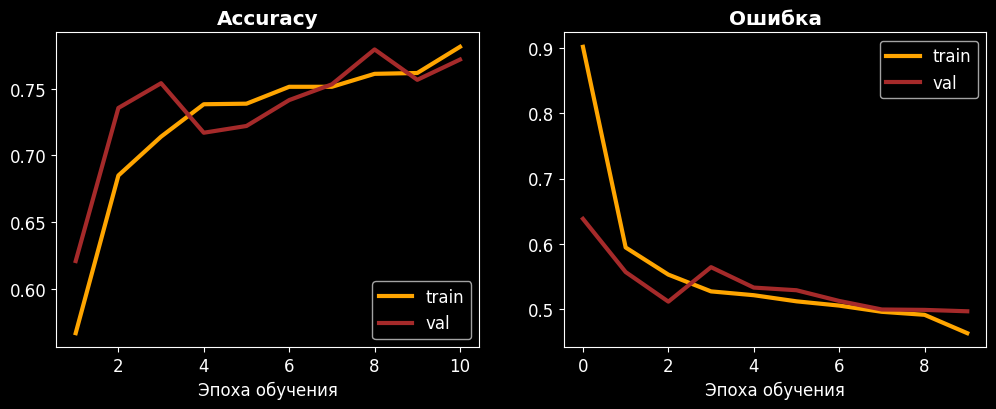

In [26]:
plot_graph(
    model.history.history["accuracy"],
    model.history.history["val_accuracy"],
    model.history.history["loss"],
    model.history.history["val_loss"],
)

Вывод: модель быстро переобучается.

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 5.</div>
Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети, с использованием слоев свёртки, регуляризации, препроцессинга изображений(Rescaling). Функция должна возвращать скомпилированную модель и иметь названия conv_nn(convolutional_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки.

In [27]:
def conv_nn():
    model = Sequential()
    model.add(Rescaling(1.0 / 255))
    model.add(Conv2D(64, (4, 4), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (4, 4), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (4, 4), activation="relu", padding="same"))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(2, activation="softmax"))

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [28]:
model = conv_nn()
model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[early_stopping])

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 35s 366ms/step - accuracy: 0.5524 - loss: 0.6899 - val_accuracy: 0.7948 - val_loss: 0.4535
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - accuracy: 0.7705 - loss: 0.4833 - val_accuracy: 0.8412 - val_loss: 0.3763
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.8219 - loss: 0.4020 - val_accuracy: 0.8623 - val_loss: 0.3372
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 226ms/step - accuracy: 0.8472 - loss: 0.3583 - val_accuracy: 0.8818 - val_loss: 0.3030
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - accuracy: 0.8589 - loss: 0.3226 - val_accuracy: 0.8868 - val_loss: 0.2933
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 230ms/step - accuracy: 0.8860 - loss: 0.2843 - val_accuracy: 0.8395 - val_loss: 0.3839
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - accuracy: 0.8852 - loss: 0.2728 - val_accuracy: 0.8936 - val_loss: 0.2756
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - accuracy: 0.8876 - loss: 0.2718 - val_accu

In [29]:
max(model.history.history['val_accuracy'])

0.9113175868988037

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 6.</div>
Постройте график зависимости ошибки и точности свёрточной нейронной сети в зависимости от эпох.

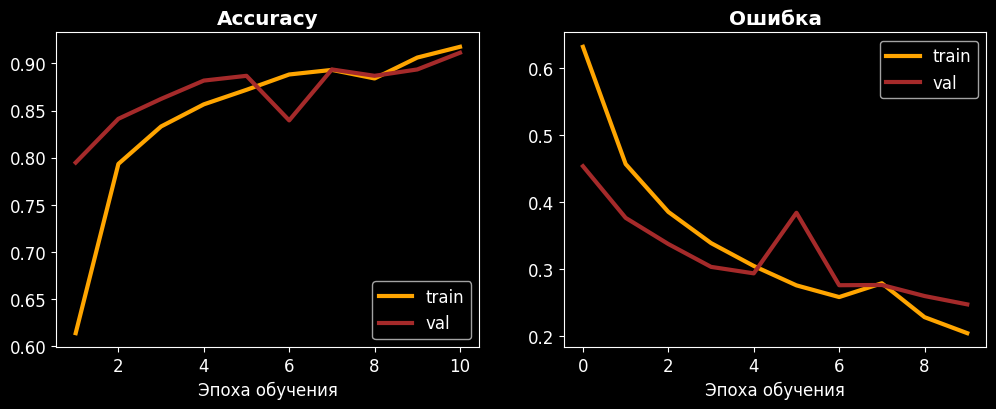

In [30]:
plot_graph(
    model.history.history["accuracy"],
    model.history.history["val_accuracy"],
    model.history.history["loss"],
    model.history.history["val_loss"],
)

Вывод: результат у модели с использованием свертки получился выше, чем на полносвязной сети.\
Accuracy = 0.91

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 7.</div>
Напишите вывод о том, при какой архитектуре нейронной сети качество получилось лучше и почему. Также укажите в выводе, какие методы препроцессинга, регуляризации или гиперпараметры дали наибольший прирост к точности.

При работе с архитектурой сделаны следующие наблюдения:
- добавление свертки значительно улучшило метрику;
- добавление слоев BatchNormalization после Pooling снижает метрику;
- добавление слоев Dropout после Pooling метрику улучшает при значении 0.3, и ухудшает при 0.1;
- poolsize увеличение до (4,4) ухудшает метрику;
- увеличие кол-ва фильтров в слое AveragePooling не меняет показатели, но увеличивает время работы;
- замена активации relu на leaky relu в полносвязных слоях уменьшает метрику.
Вцелом, изменения метрик происходили на десятые доли, кроме добавления свертки.

*Итого:* лучший результат на тестовом датасете - accuracy = 89.86


## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача дополнительная.</div>
Дообучение обученной модели

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (71, 71)
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1 / 255.0,
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)


train_ds = train_datagen.flow_from_directory(
    f"{IMAGE_PATH}/train",
    target_size=image_size,
    class_mode="categorical",
    batch_size=batch_size,
)

val_ds = val_datagen.flow_from_directory(
    f"{IMAGE_PATH}/test",
    target_size=image_size,
    class_mode="categorical",
    shuffle=False,
    batch_size=batch_size,
)

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [32]:
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
# data_augmentation = Sequential([
#   RandomZoom((-0.05, 0.05)),
#   RandomContrast(0.15)])

In [38]:
image_shape = image_size + (3,)

base_model = tf.keras.applications.Xception(
    weights='imagenet',
    input_shape=image_shape,
    include_top=False)

base_model.trainable = False


inputs = tf.keras.Input(shape=image_shape)
# x = data_augmentation(inputs)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.25)(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile('adam', 'categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_ds, epochs=10, validation_data=val_ds)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 58s 592ms/step - accuracy: 0.8047 - loss: 0.4200 - val_accuracy: 0.9265 - val_loss: 0.2107
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 62s 410ms/step - accuracy: 0.9103 - loss: 0.2363 - val_accuracy: 0.9341 - val_loss: 0.1734
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 424ms/step - accuracy: 0.9165 - loss: 0.2104 - val_accuracy: 0.9375 - val_loss: 0.1630
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 440ms/step - accuracy: 0.9129 - loss: 0.2126 - val_accuracy: 0.9333 - val_loss: 0.1594
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 409ms/step - accuracy: 0.9194 - loss: 0.2043 - val_accuracy: 0.9341 - val_loss: 0.1639
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 426ms/step - accuracy: 0.9201 - loss: 0.1972 - val_accuracy: 0.9324 - val_loss: 0.1572
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 482ms/step - accuracy: 0.9309 - loss: 0.1783 - val_accuracy: 0.9324 - val_loss: 0.1573
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 486ms/step - accuracy: 0.9331 - loss: 0.1727 - val_accuracy: 0.937

In [39]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 71, 71, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 3, 3, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,255,280 (81.08 MB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 262,534 (1.00 MB)

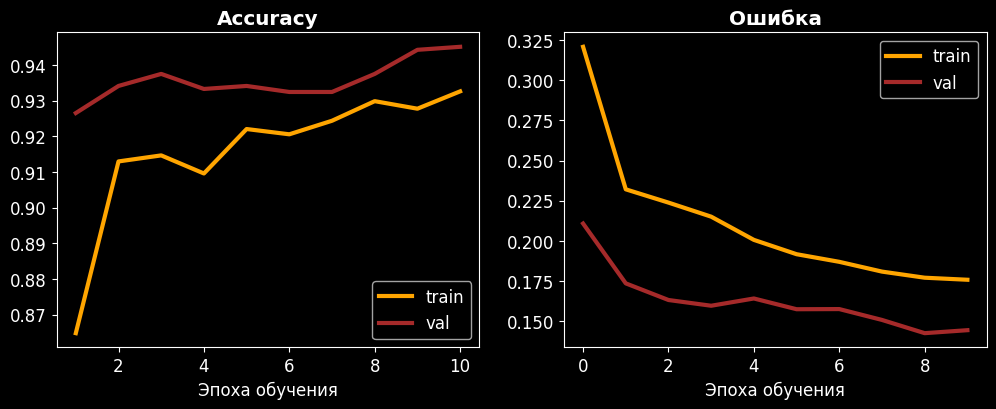

In [40]:
plot_graph(
    model.history.history["accuracy"],
    model.history.history["val_accuracy"],
    model.history.history["loss"],
    model.history.history["val_loss"],
)

In [41]:
max(model.history.history['val_accuracy'])

0.9451013803482056

*Вывод:* результат, полученный на предобученной модели вышел выше, чем на кастомной.\
Accuracy=0.9451\
Аугментация силами keras давала результат не более 0.9.\
Изменение ошибки на "categorical_crossentropy" тоже позволило увеличить метрику.\